## Hw4
### Name: Jonathan Reyes
### COSC 3337

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data_h4_3337.csv')

# Display the first 5 observations
print(df.head())

# How many observations in total
print(f"Total observations: {df.shape[0]}")

# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Total observations: 200
Missing values: 0
Unique values in CustomerID: 200
Unique values in Gender: 2
Unique values in Age: 51
Unique values in Annual Income (k$): 64
Unique values in Spending Score (1-100): 84


## Step 1 Questions
### How many observations are there in total?
#### Based on the metrics pulled from the data we can see that there is a total of 200 observations in the dataset that was provided to us
### Are there any missing values?
#### There is no missing values in the dataset that is provided
### How many unique values are in each column?
#### Based on the metrics pulled from the data we can see that there is a total of 200 unique observations for customerid, 2 for gender, 51 for age, 64 for annual income and 84 for spending score, leading to a total of 401 total unique values in the dataset that was provided

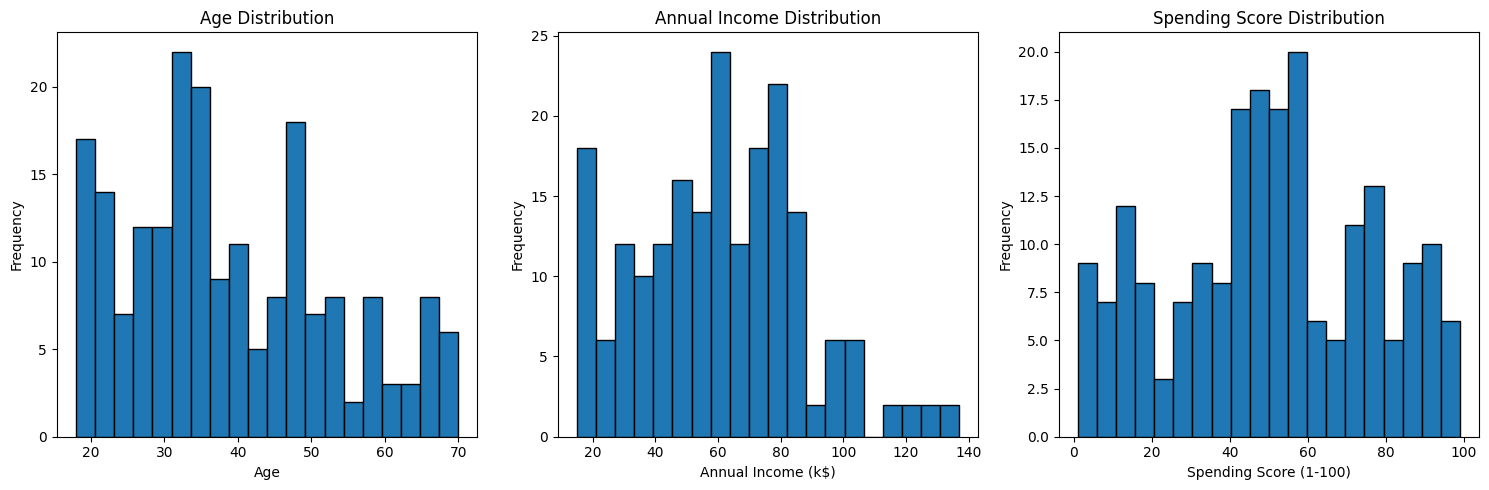

In [34]:
plt.figure(figsize=(15, 5))
# Plotting the histogram for age
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Plotting the Histogram for annual income
plt.subplot(1, 3, 2)
plt.hist(df['Annual Income (k$)'], bins=20, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
# Plotting the histogram for spending score
plt.subplot(1, 3, 3)
plt.hist(df['Spending Score (1-100)'], bins=20, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### What can you conclude from the plots you created? Are there any interesting findings?
#### Looking at the plot for the age distribution we can notice that there is a normal distribution between the males and females, from the annual income distribution we can observe that there is a slight skewness to the right with majority of the customers having a income in the lower and middle income brackets. In the Spending Score distribution we can observe that there is a relatively uniform or bimodal distribution which is interesting since this can mean that there is different spending behaviors across all of the different customers that is in the dataset

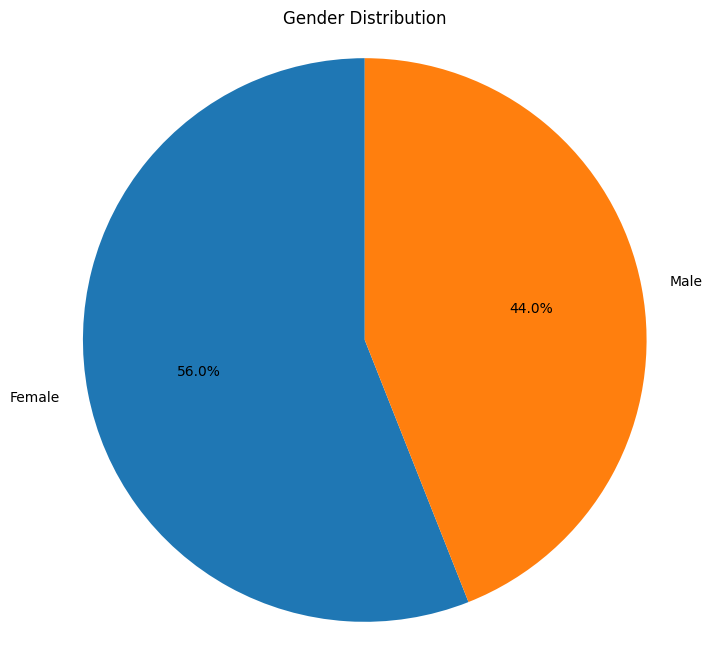

In [35]:
# Plotting the pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### What can you conclude from the plot you created?
#### Looking at the pie chart we can see that there is a relatively balanced distribution between male and female customers with a slight majority of female customers (around 55-60%).

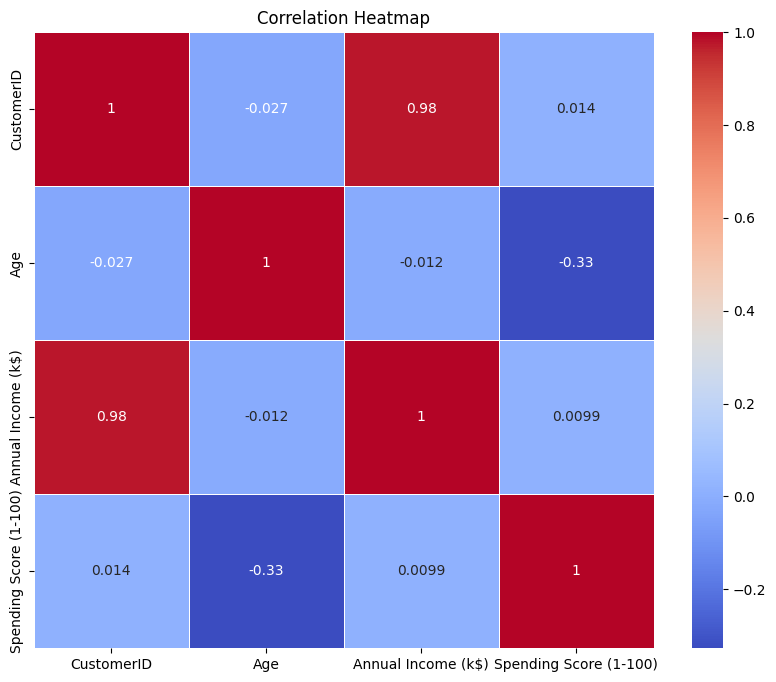

In [36]:
# Plotting the heatmap for the correlations
plt.figure(figsize=(10, 8))
# Exclude 'CustomerID' and potentially 'Gender' from the correlation matrix to avoid issues
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### After creating your heatmap, is there anything interesting?, For example, any significant multicollinearity?
#### Looking at the heatmap we can see that there is multicollinearity between customerid and annual income as the score mapped those two variable to 0.98, we can also observe that there is a moderate negative correlation between age and spending score (with a score of -0.33) which indicates that as the age of the customer increases the spending behavior tends to decrease

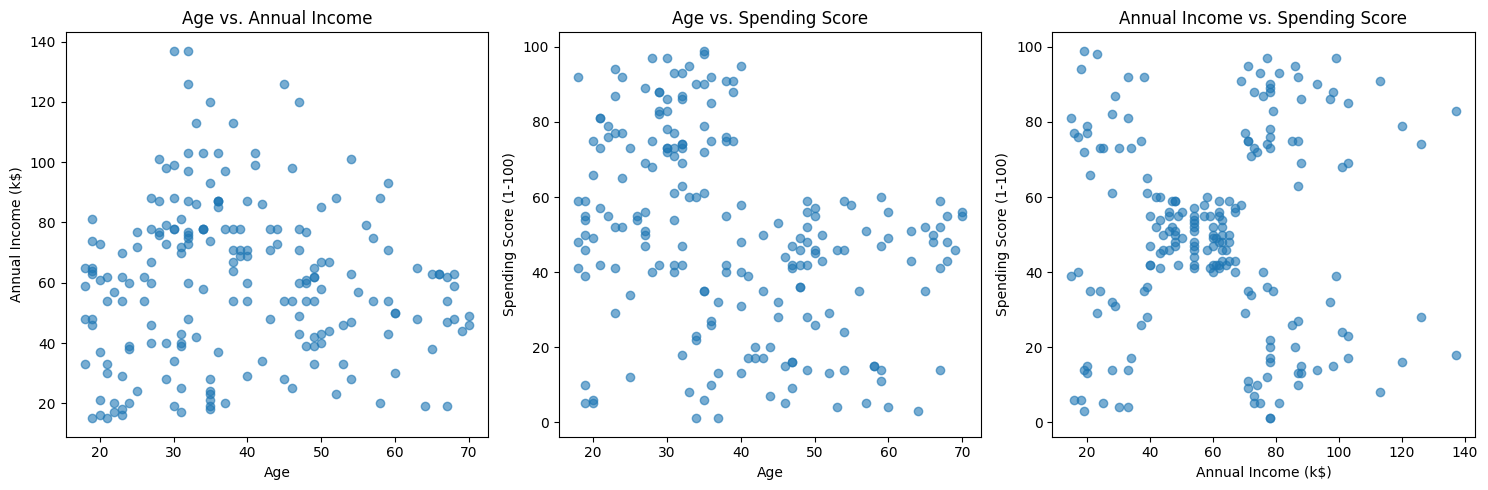

In [37]:
plt.figure(figsize=(15, 5))
# Plotting scatterplot for age v annual income
plt.subplot(1, 3, 1)
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.6)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
# Plotting scatterplot for age v spending score
plt.subplot(1, 3, 2)
plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.6)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
# Plotting annual income v spending score
plt.subplot(1, 3, 3)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

### What can you conclude from the plots you created? Are there any interesting findings?
#### Looking at the age vs annual income we can see that there is no clear correlation between the two as the plot is scattered with no clear pattern meaning that age does not predict income level in this dataset
#### For the age vs spending plot we can see that there is a slight downward trend which can mean that younger individuals in this dataset have higher spending scores
#### Looking at the annual income vs spending score we can there is no clear pattern but there is clusters in the plot for the following groups : high income/high spending, high income/low spending, low income/high spending, and low income/low spending

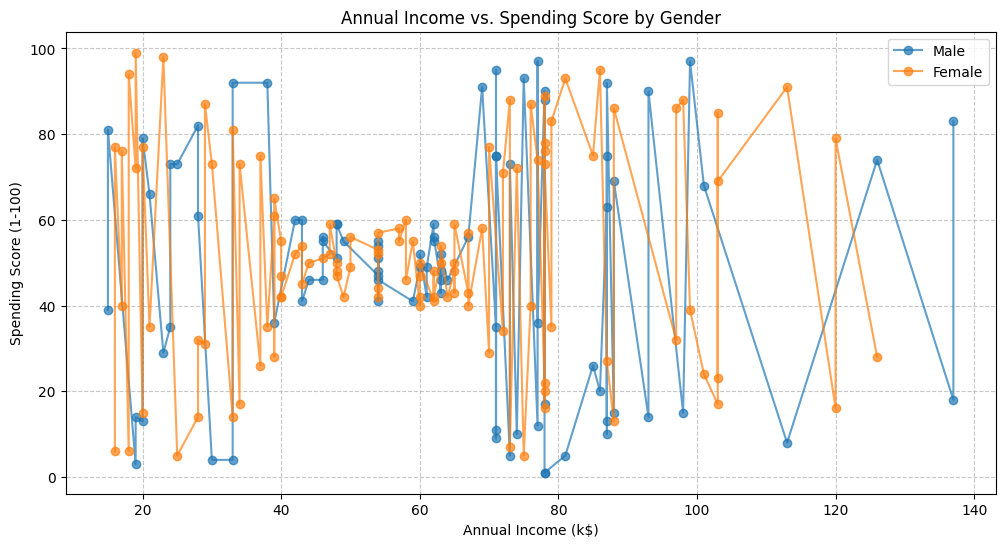

In [38]:
# Plotting the line graph of annual income v spending score
plt.figure(figsize=(12, 6))
for gender in df['Gender'].unique():
    gender_df = df[df['Gender'] == gender]
    # Sort by income to make the line graph more meaningful
    gender_df = gender_df.sort_values('Annual Income (k$)')
    plt.plot(gender_df['Annual Income (k$)'], gender_df['Spending Score (1-100)'], 
             label=gender, marker='o', linestyle='-', alpha=0.7)

plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### What can you say about the plot you created?
#### Looking at the line graph we can see that there is similar patterns for both genders with potentially higher spending scores for female customers at similar income levels, it can also be seen that there is fluctuations in the graph which could indicate that spending behavior is not highly correlated with income

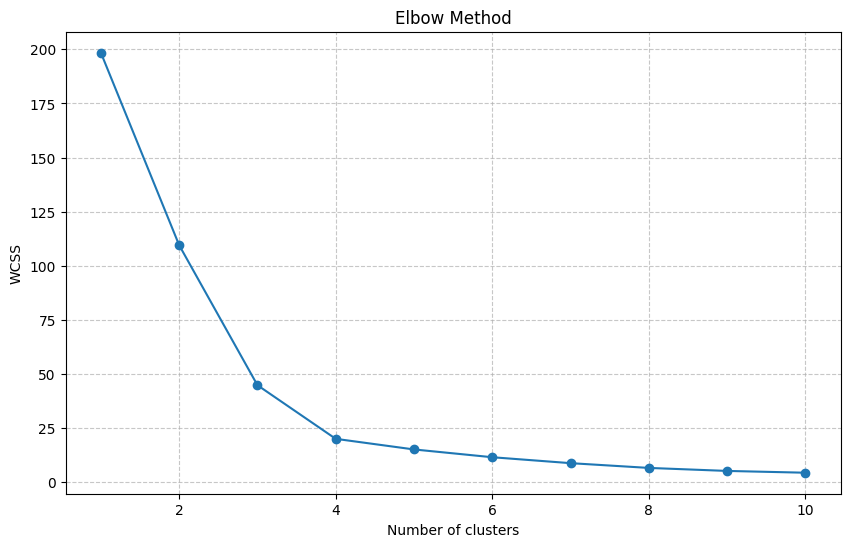

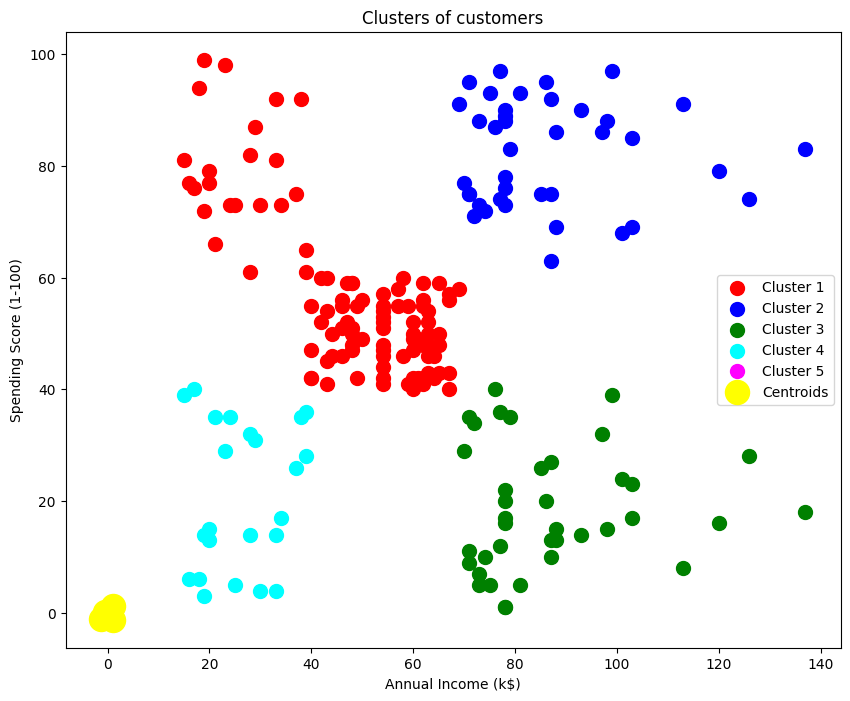

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer

# Extract the relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the scaled features
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X_scaled)

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components (useful if you have more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)


# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Determine the optimal cluster number from the elbow chart
optimal_clusters = 4

# Create and fit the K-means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

###

### Looking at the elbow plot we can tell that the optimal number of clusters is 4 since that is where the elbow starts to bend in the plot

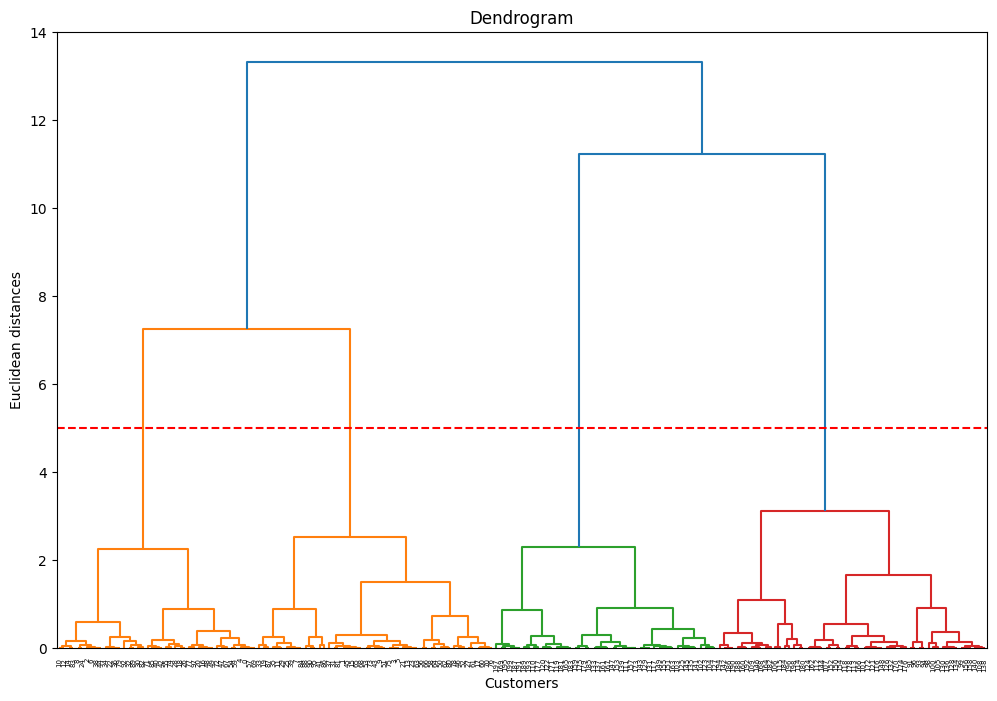

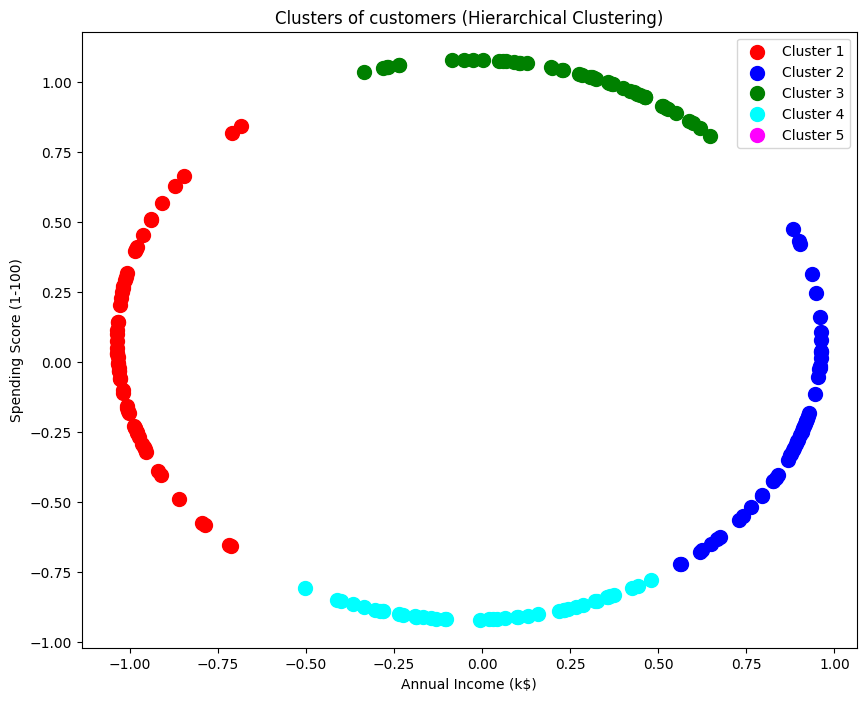

In [40]:
import scipy.cluster.hierarchy as sch

# Create dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=5, color='r', linestyle='--')  # This threshold can be adjusted
plt.show()

# Fit hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
y_hc = hc.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_pca[y_hc == 4, 0], X_pca[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Step 5 questions
### Briefly explain how both k-means and hierarchical clustering work along with their advantages/disadvantages if any.
#### Hierarchical clustering works by building a tree of clusters (dendrogram) either by merging (agglomerative) or splitting (divisive) its advantages are that it does not to specify number of clusters beforehand, provides a complete hierarchy of clusters, more flexible in cluster shapes but has the major disadvantage of higher computational complexity O(n³), not as scalable for large datasets, and can be sensitive to noise.
#### While K-means clustering works by iteratively assigning data points to the nearest centroid and updating centroids its advantages scalable, simple to implement, works well on globular clusters with the disadvantages of requiring specifying k beforehand, sensitive to initial centroid positions, assumes spherical clusters, affected by outliers

### Give an example of where you could use hierarchical clustering or k-means?
#### k-means will be ideal when we have to work with large datasets and need to process them efficiently while hierarchical clustering will be better used when we want to test different numbers of segments or need a more detailed analysis of how the features work or correlate.